In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
from sklearn.datasets import make_classification


data, labels = make_classification(n_samples=1000, n_features=5, random_state=42)

In [3]:
df = pd.DataFrame(data, columns=[f'feature_{i}'for i in range(1,6)])
df['label'] = labels

In [4]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,label
0,-0.439643,0.542547,-0.822420,0.401366,-0.854840,0
1,2.822231,-2.480859,-1.147691,-2.101131,3.040278,1
2,1.618386,-1.369478,-2.084113,-1.179659,1.613602,1
3,1.659048,-0.615202,1.112688,-0.835098,-0.272205,1
4,1.849824,-1.679456,-0.926698,-1.402509,2.123129,1


In [5]:
#spliting the datasets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state= 42)

In [17]:
# Standardizing the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Creating and tranning logistic regression model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:

print("Accuracy:", accuracy_score(y_test, y_pred))
conf_mat= confusion_matrix(y_test, y_pred)

Accuracy: 0.885


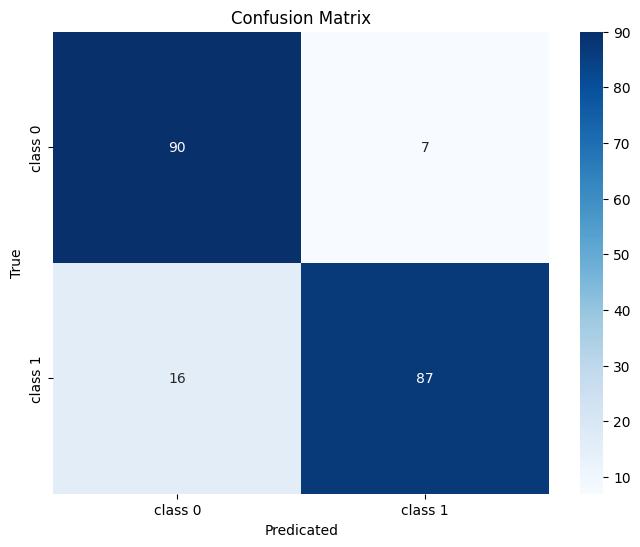

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot= True, cmap="Blues", xticklabels= ['class 0', 'class 1'], yticklabels= ['class 0', 'class 1'])
plt.xlabel('Predicated')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Advance Logistic Regression: regularization and feature importance

In [ ]:
## Regularized logisticc regression

model_reg = LogisticRegression(penalty= '12', C=0.4, solver= 'lbfgs')
model_reg.fit(X_train, y_train)
print("Accuracy with Regularization:", accuracy_score(y_test, model_reg.predict(X_test) ))

InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'l2', 'elasticnet'} or None. Got '12' instead.

In [18]:
# example feature input for infrence
example_features = np.array([[0.5, -1.2, 2.3, 0.8, -.5]])

# scaler = StandardScaler()
example_features_scaled = scaler.transform(example_features)